In [2]:
import city2graph as c2g
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx

In [7]:
# get feature from osm and project
poi_tags = { "amenity": ["restaurant"] } 
poi_gdf = ox.features_from_place("Shibuya, Tokyo, Japan", poi_tags)
poi_gdf = ox.features_from_point( (35.658514, 139.70133), tags=poi_tags, dist=1000)
poi_gdf = poi_gdf[poi_gdf.index.get_level_values("element") == "node"] 
poi_gdf = poi_gdf.to_crs(epsg=6677)

In [5]:
# get graph 
segments_G = ox.graph_from_point(
    (35.658514, 139.70133),  # Tokyo Tower coordinates
    dist=1000,  # Search radius in meters
    )

segments_gdf = c2g.nx_to_gdf(segments_G, nodes=False, edges=True)

In [8]:
import matplotlib.colors as mcolors

def get_degree_colors(graph, cmap_name='plasma'):
    """Generate colors based on node degree."""
    if not graph:
        return []
    
    degree_dict = dict(graph.degree())
    values = list(degree_dict.values())
    
    if not values:
        return []
        
    norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
    cmap = plt.get_cmap(cmap_name)
    
    # Match order of nodes in graph
    return [mcolors.to_hex(cmap(norm(degree_dict[n]))) for n in graph.nodes()]

In [11]:
# right angle distances
knn_l1_nodes, knn_l1_edges = c2g.knn_graph(
    poi_gdf,
    distance_metric="manhattan",
    network_gdf=segments_gdf.to_crs(epsg=6677)
    )

# hypothenuse distance (shortest distance along a straight line)
knn_l2_nodes, knn_l2_edges = c2g.knn_graph(
    poi_gdf,
    distance_metric="euclidean",
    network_gdf=segments_gdf.to_crs(epsg=6677)
    )

# actual path distance
knn_net_nodes, knn_net_edges = c2g.knn_graph(
    poi_gdf,
    k=10,
    distance_metric="network",
    network_gdf=segments_gdf.to_crs(epsg=6677)
    )

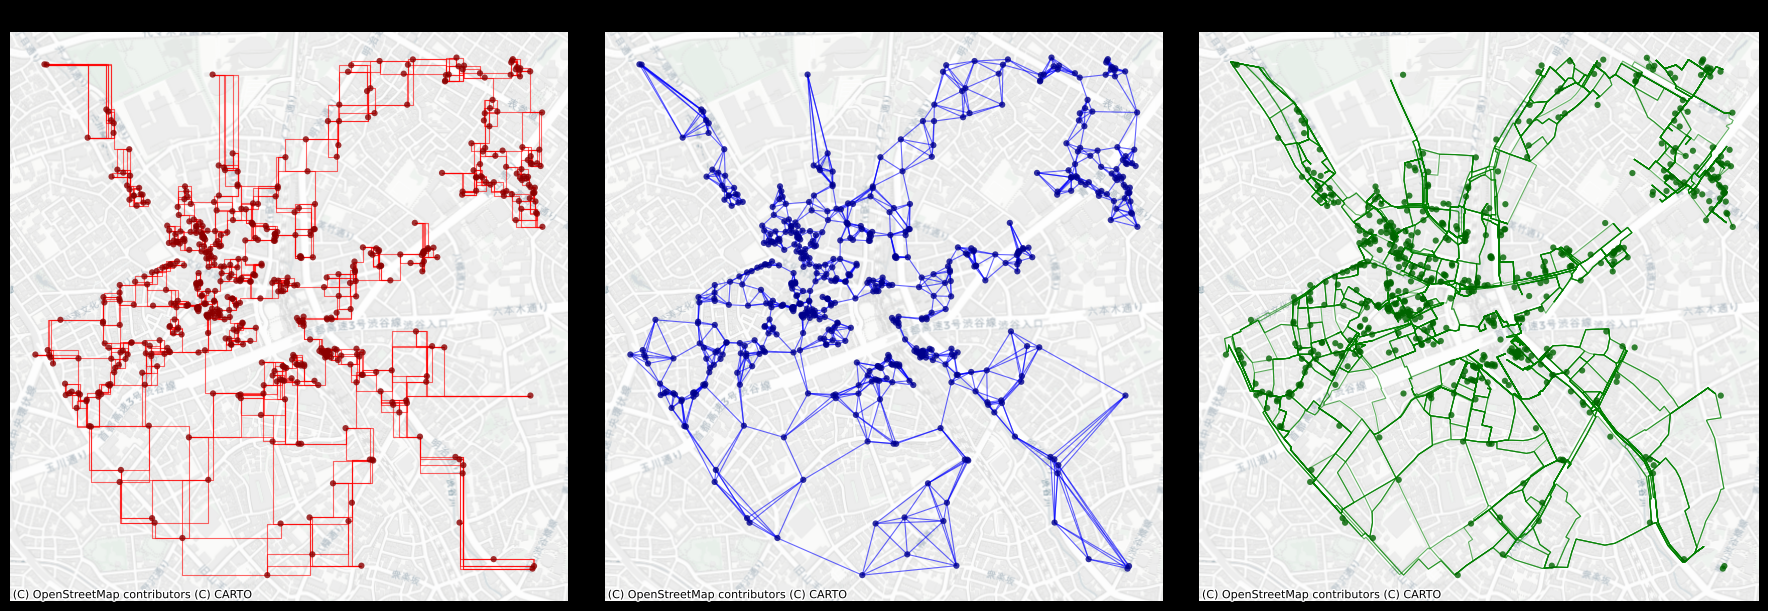

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Manhattan distance KNN Graph
c2g.plot_graph(
    nodes=poi_gdf,
    edges=knn_l1_edges,
    ax=axes[0],
    node_color='darkred',
    edge_color='red',
    markersize=20,
    node_alpha=0.8,
    edge_linewidth=0.8,
    edge_alpha=0.6
    )

ctx.add_basemap(axes[0], crs=poi_gdf.crs, source=ctx.providers.CartoDB.Positron)
axes[0].set_title('KNN Graph - Manhattan Distance', fontsize=12, fontweight='bold')
axes[0].set_axis_off()

# Plot Euclidean distance KNN Graph
c2g.plot_graph(
    nodes=poi_gdf,
    edges=knn_l2_edges,
    ax=axes[1],
    node_color='darkblue', 
    edge_color='blue',
    markersize=20, 
    node_alpha=0.8,
    edge_linewidth=0.8,
    edge_alpha=0.6
    )

ctx.add_basemap(axes[1], crs=poi_gdf.crs, source=ctx.providers.CartoDB.Positron)
axes[1].set_title('KNN Graph - Euclidean Distance', fontsize=12, fontweight='bold')
axes[1].set_axis_off()

# Plot Network distance KNN Graph
c2g.plot_graph(
    nodes=poi_gdf,
    edges=knn_net_edges,
    ax=axes[2],
    node_color='darkgreen',
    edge_color='green',
    markersize=20, 
    node_alpha=0.8,
    edge_linewidth=0.8,
    edge_alpha=0.6
    )

ctx.add_basemap(axes[2], crs=poi_gdf.crs, source=ctx.providers.CartoDB.Positron)
axes[2].set_title('KNN Graph - Network Distance', fontsize=12, fontweight='bold')
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

In [3]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'CAT': {'url': 'https://tile.openstreetmap.bzh/ca/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="https://www.openstreetmap.cat" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'name': 'OpenStreetMap.CAT'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contribut